# Breast Cancer Prediction - Exploratory Data Analysis

Breast cancer is the most commonly diagnosed cancer in woman and is the leading cause of cancer deaths.

In this notebook we are going to analyse Breast Cancer Wisconson Diagnostic data from 

Kaggle - https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

-----------------------------------------------------------    

A basic analysis of 

-- how are the features classified

-- how the features are related

-- are there outliers and do they affect the model

-- does normalization have a effect on data. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder

Data downloded from Kaggle in csv format, is loaded into a dataframe for analysis

In [2]:
df_cancer = pd.read_csv(r'../RawData/data.csv')
df_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df_cancer.shape

(569, 33)

In [4]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Features or attributed 1 - 31 have no missing values

Feature 31 is a column with all missing values. We will need to drop this column as it gived no information with respect to dataset.

Only 'diagnosis' is of type object and all other data are numerical

In [5]:
df_cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


Dropping columns which are not required for model training
-----

id - is a unique patient id, this data is not required as every new paitent will have a unique ID

Unnamed: 32 - Contains only Null values

In [6]:
df_cancer.drop(columns=['id', 'Unnamed: 32'],inplace = True)

Correlation 
---------

Correlation of each feature, except diagnosis is visualized, this is to identify how the features are related to one another

If correlation is close to +1 or -1, those features are highly correlated with one another

Positive correlation - indiacte that there a variable is directly dependance on another i.e. as one variable value increases the other increases

Negative correlation - incates that they negatively dependant, i.e. as one increases the other decreases

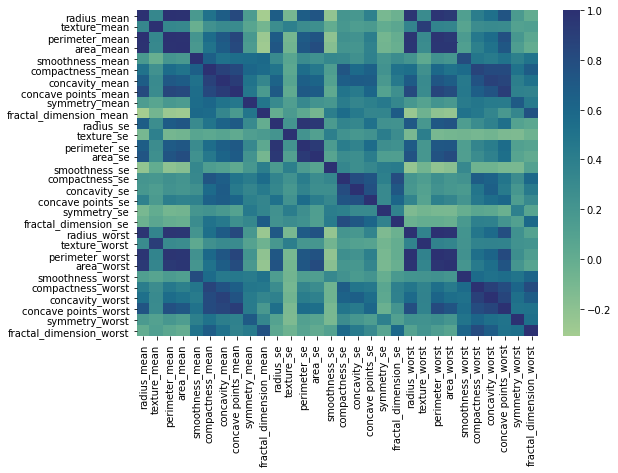

In [7]:
fig, ax = plt.subplots(figsize=(9,6)) 
heatmap_cancer = sns.heatmap(df_cancer.corr(),cmap="crest", ax=ax)
plt.savefig('heatmap_cancer.svg', bbox_inches='tight')

Looking at the data the first thing we notice is that it contains a number of correlated predictors. We can see strong positive relationship exists with some mean value and worst value paramaters between 1-0.8;

The mean area of the tissue nucleus has a strong positive correlation with mean values of radius and perimeter; 
Same trend is observed in Worst

Some paramters are moderately positive corrlated (r between 0.5-0.75), those are concavity and area, concavity and perimeter etc 

*Likewise, we see few negative correlations between fractal_dimension with radius, texture, parameter mean values.


To understand in depth, we are going to analyse only mean group correlation

In [8]:
mean_columns = [col for col in df_cancer.columns if 'mean' in col]
df_mean = df_cancer[mean_columns]
df_mean.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [9]:
for col in df_mean.columns:
    df_mean.rename(columns={col:col.replace("_mean","")},inplace=True)
df_mean.head()

/Users/ashuttii/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal_dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


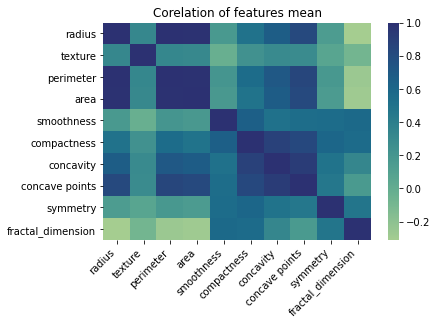

In [10]:
fig, ax = plt.subplots() 
heatmap_cancer_m = sns.heatmap(df_mean.corr(),cmap="crest")
heatmap_cancer_m.set_xticklabels(heatmap_cancer_m.get_xticklabels(),rotation=45, horizontalalignment='right')
plt.title('Corelation of features mean')
plt.savefig('heatmap_mean_cancer1.svg', bbox_inches='tight')
plt.show()

We can see that area, perimeter, radius are highly correlated and concavity - compactness, concave points with area, radius and perimeter had moderatly high correlation  


Scatter Plot
--------

Scatter plot to understand the distribution of data. Here the data is plotted with respect to radius mean. 


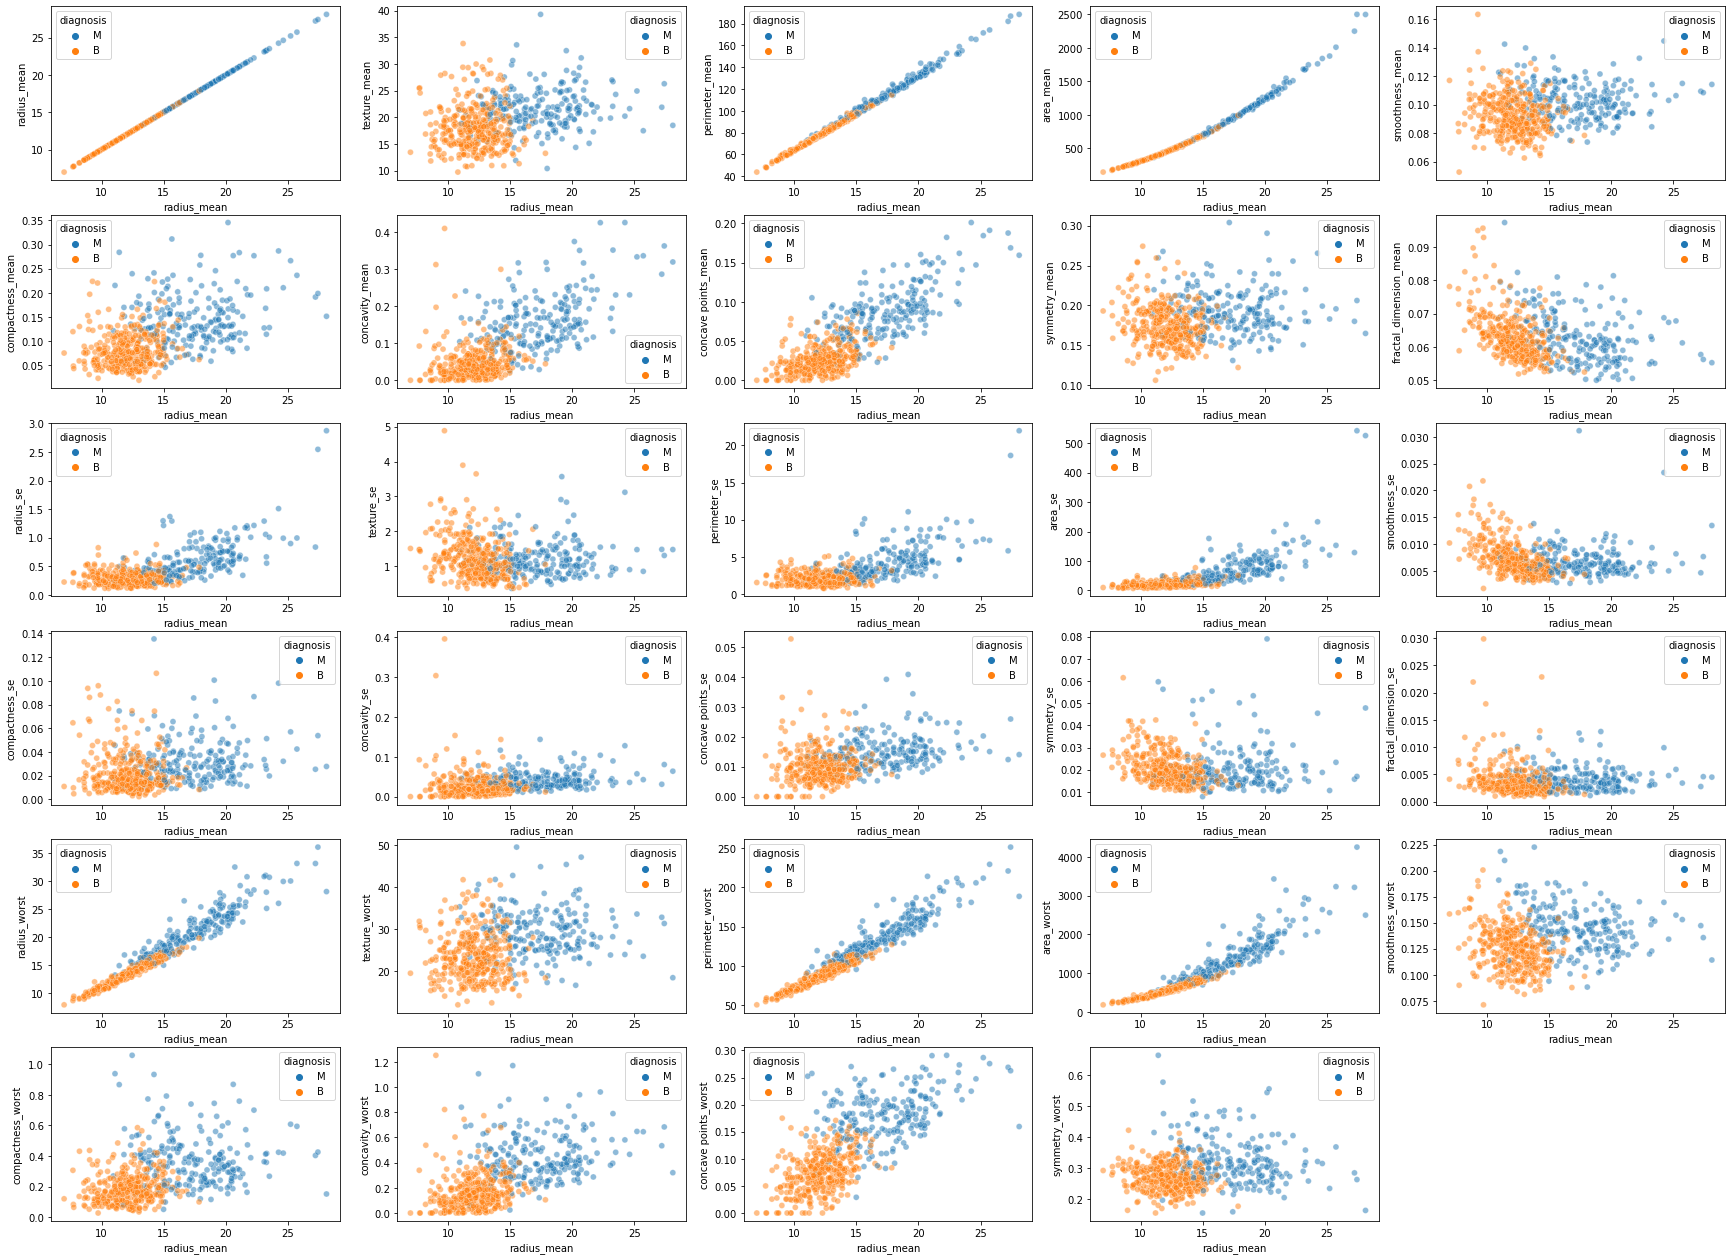

In [11]:
plt.figure(figsize=(30,30), facecolor='white')
plotnumber = 1

col=df_cancer.columns
for i in range(1,len(col)-1) :
    ax = plt.subplot(8,5,plotnumber)
    sns.scatterplot(x=df_cancer['radius_mean'],y=df_cancer[col[i]], alpha=0.5, hue=df_cancer['diagnosis'] )
    plotnumber+=1
plt.show()

# Target value count

In [12]:
df_cancer['diagnosis_1'] = np.where(df_cancer['diagnosis']=='M','Malignant','Benign')

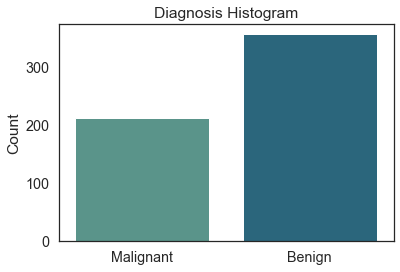

In [13]:
sns.set(font_scale=1.3, )
sns.set_style('white')
sns.countplot(x='diagnosis_1', data=df_cancer,palette="crest")
plt.xlabel("")
plt.ylabel("Count")
plt.title('Diagnosis Histogram')
plt.savefig('countPlot_M_B.svg', bbox_inches='tight')
plt.show()

In [14]:
df_cancer['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

'diagnosis' is the only feature with object datatype, 
Converting to numerical data to perform Machine Learning techniques

0 - Benign

1 - Malignant

In [15]:
df_cancer['diagnosis'] = np.where(df_cancer['diagnosis']=='M',1,0)

Dropping columns that are not required for model training

diagnosis_1 - column was created only for visualization


In [16]:
df_cancer.drop(columns=['diagnosis_1'],inplace = True)

In [17]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

To observe how the classes are distributed aboung data, we plot scatterplots between mean and worst features. 

We can observe that in most of the plots, data in top right is from Malignant class

In [18]:
feature_list = ['perimeter',
 'concave points',
 'area',
 'concavity',
 'radius',
 'texture',
 ]

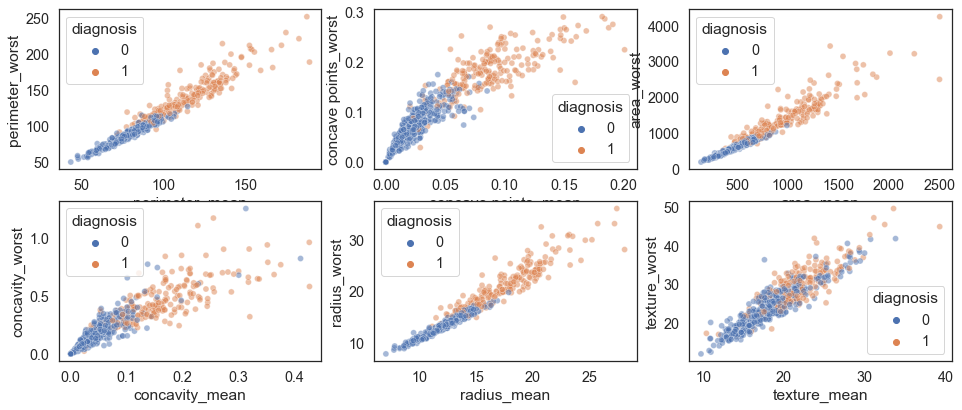

In [19]:
fig = plt.figure(figsize=(16,10), facecolor='white')
plotnumber = 1

#col=df_cancer.columns
for i in range(0,len(feature_list)) :
    ax = plt.subplot(3,3,plotnumber)
    sns.scatterplot(x=df_cancer[feature_list[i]+'_mean'],y=df_cancer[feature_list[i]+'_worst'],alpha=0.5, hue=df_cancer['diagnosis'] ) 
    plotnumber+=1
#plt.title('Distribution between feature mean and feature worst, 0 - Benign; 1 - Malignent')

plt.savefig('scatterplot.svg', bbox_inches='tight')
plt.show()

Visualizing Normalized data and basic data to check if there are any changes in trend

In [20]:
normalized_df=(df_cancer-df_cancer.mean())/df_cancer.std()

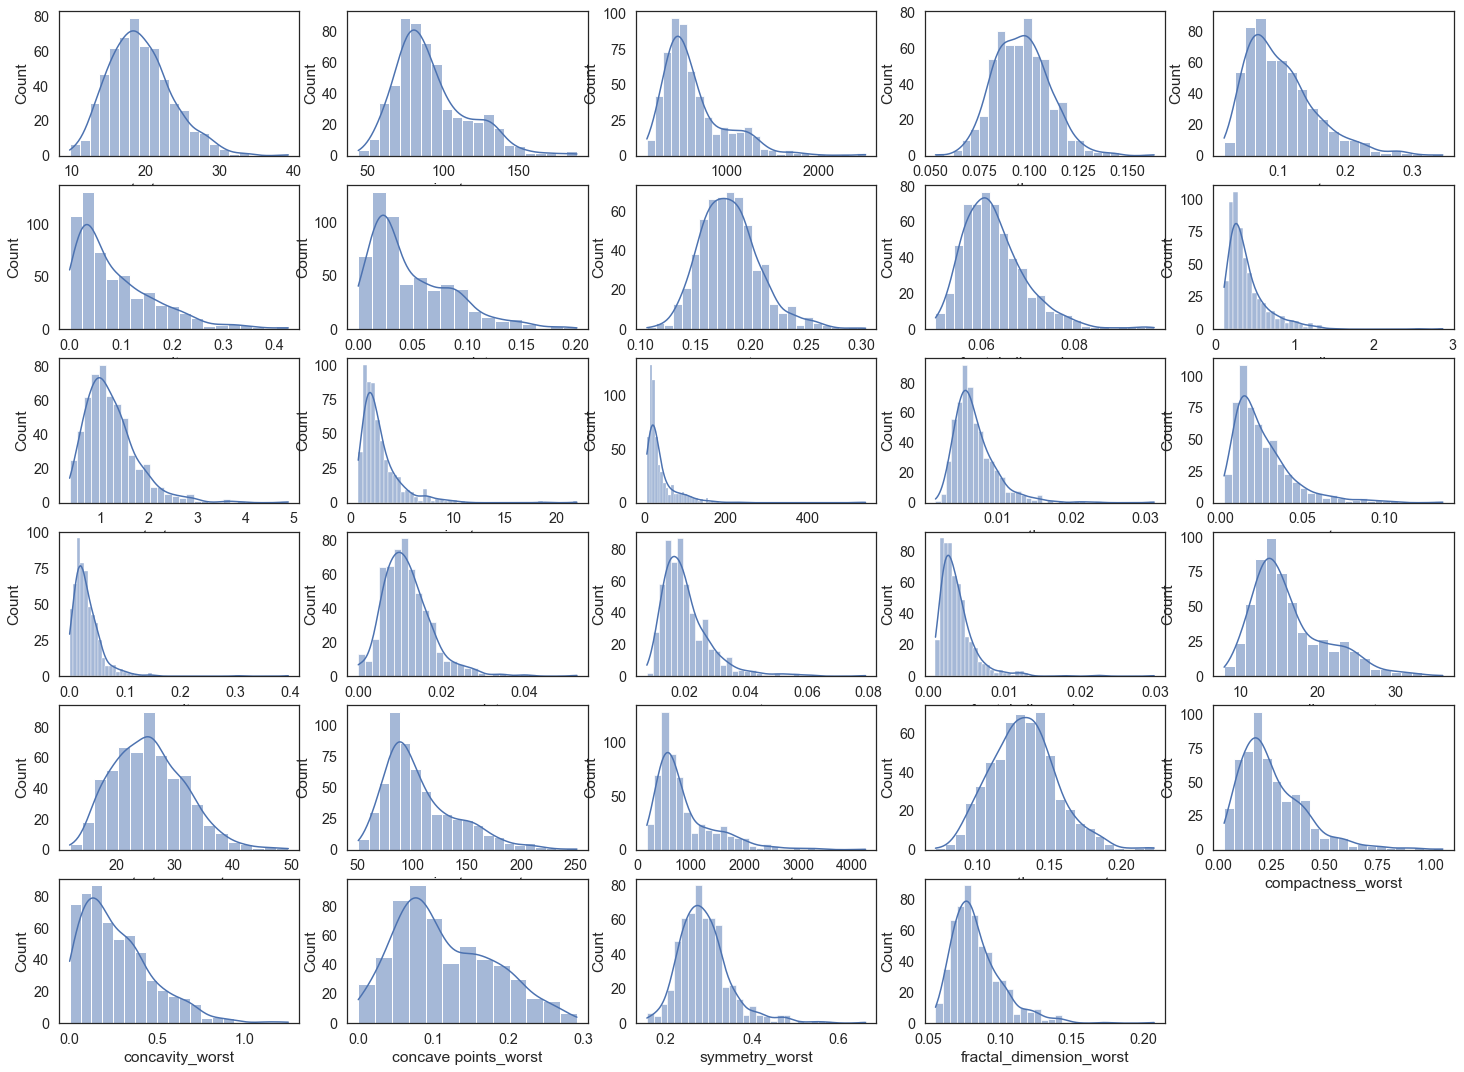

In [21]:
fig = plt.figure(figsize=(25,25), facecolor='white')
plotnumber = 1

col=df_cancer.columns
for i in range(2,len(col)) :
    ax = plt.subplot(8,5,plotnumber)
    sns.histplot(df_cancer[col[i]], kde=True)
    plotnumber+=1
plt.show()

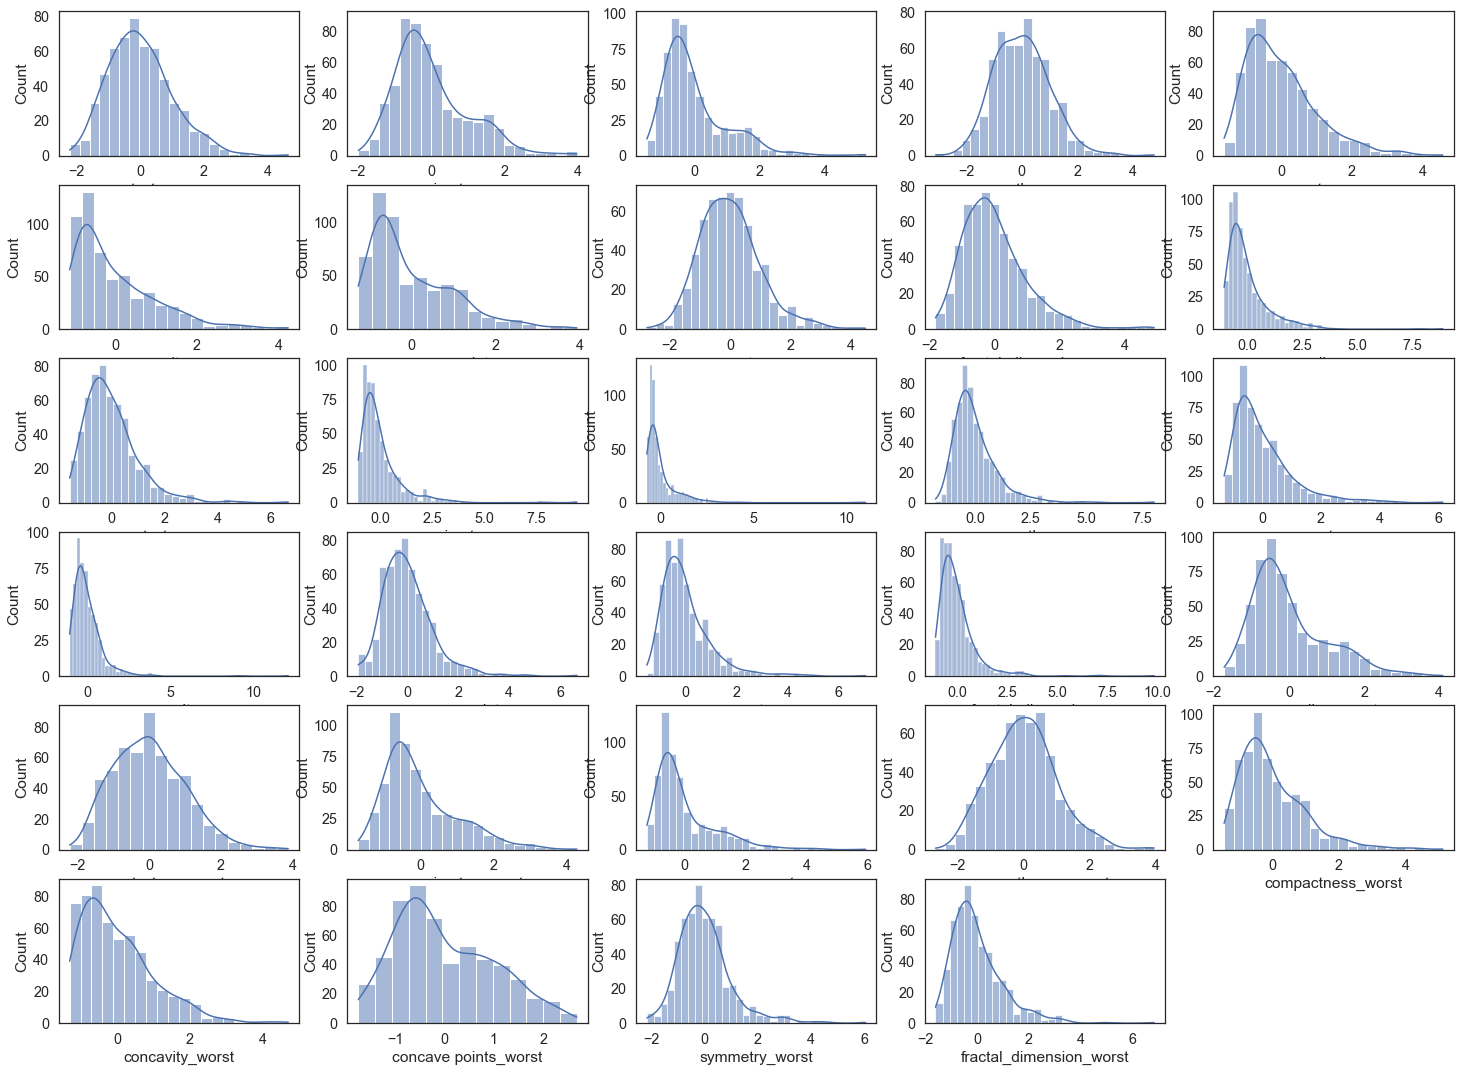

In [22]:
fig = plt.figure(figsize=(25,25), facecolor='white')
plotnumber = 1

col=normalized_df.columns
for i in range(2,len(col)) :
    ax = plt.subplot(8,5,plotnumber)
    sns.histplot(normalized_df[col[i]], kde=True)
    plotnumber+=1
plt.show()

In [23]:
#ref - https://www.codegrepper.com/code-examples/python/to_csv+create+folder
import os

outname = 'cancerDataforModel.csv'

path='../ModelCreationAndCompare/'
if not os.path.exists(path):
    os.mkdir(path)

fullname = os.path.join(path, outname)    

df_cancer.to_csv(fullname, index=False)

In [24]:
df_cancer.to_csv('cancerDataforModel1.csv',index=False)